In [1]:
# import 'Numpy' 
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
air_data = pd.read_csv('air_distance.csv')
air_data.head()

,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.710000
1,1,CCU,IXR,327.840000
2,2,IXR,BBI,344.540000
3,3,BBI,BLR,1166.170000
4,4,DEL,LKO,423.410000


In [3]:
fare = pd.read_excel('airfare.xlsx')
fare.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            9000 non-null   object
 1   Date               9000 non-null   object
 2   Departure Station  9000 non-null   object
 3   Arrival Station    9000 non-null   object
 4   Route Map          9000 non-null   object
 5   Departure Time     9000 non-null   object
 6   Arrival Time       9000 non-null   object
 7   Journey Time       9000 non-null   object
 8   Stops              9000 non-null   object
 9   Extra Info         9000 non-null   object
 10  Price              9000 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 773.6+ KB


In [5]:
fare.columns

Index(['Airline', 'Date', 'Departure Station', 'Arrival Station', 'Route Map',
       'Departure Time', 'Arrival Time', 'Journey Time', 'Stops', 'Extra Info',
       'Price'],
      dtype='object')

In [6]:
fare["Journey Time"].value_counts().head()

2h 50m    471
1h 30m    326
2h 45m    290
2h 55m    288
2h 35m    276
Name: Journey Time, dtype: int64

In [7]:
fare.isnull().sum()

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            0
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                0
Extra Info           0
Price                0
dtype: int64

In [8]:
fare["Journey_day"] = pd.to_datetime(fare.Date, format="%d/%m/%Y").dt.day

In [9]:
fare["Journey_month"] = pd.to_datetime(fare["Date"], format = "%d/%m/%Y").dt.month

In [10]:
fare.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
fare.drop(["Date"], axis = 1, inplace = True)

In [12]:
fare.head()

,Airline,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
fare["Dep_hour"] = pd.to_datetime(fare["Departure Time"]).dt.hour
fare["Dep_min"] = pd.to_datetime(fare["Departure Time"]).dt.minute

fare.drop(["Departure Time"], axis = 1, inplace = True)

In [14]:
fare.head()

,Airline,Departure Station,Arrival Station,Route Map,Arrival Time,Journey Time,Stops,Extra Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
fare["Arrival_hour"] = pd.to_datetime(fare['Arrival Time']).dt.hour

fare["Arrival_min"] = pd.to_datetime(fare['Arrival Time']).dt.minute

fare.drop(["Arrival Time"], axis = 1, inplace = True)

In [16]:
fare.head()

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Extra Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
duration = list(fare["Journey Time"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
fare["Duration_hours"] = duration_hours
fare["Duration_mins"] = duration_mins

In [19]:
fare.drop(["Journey Time"], axis = 1, inplace = True)

In [20]:
fare.head()

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [21]:
fare["Airline"].value_counts()

Jet Airways                          3227
IndiGo                               1757
Air India                            1471
Multiple carriers                    1014
SpiceJet                              697
Vistara                               399
Air Asia                              256
GoAir                                 160
Multiple carriers Premium economy      11
Jet Airways Business                    4
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

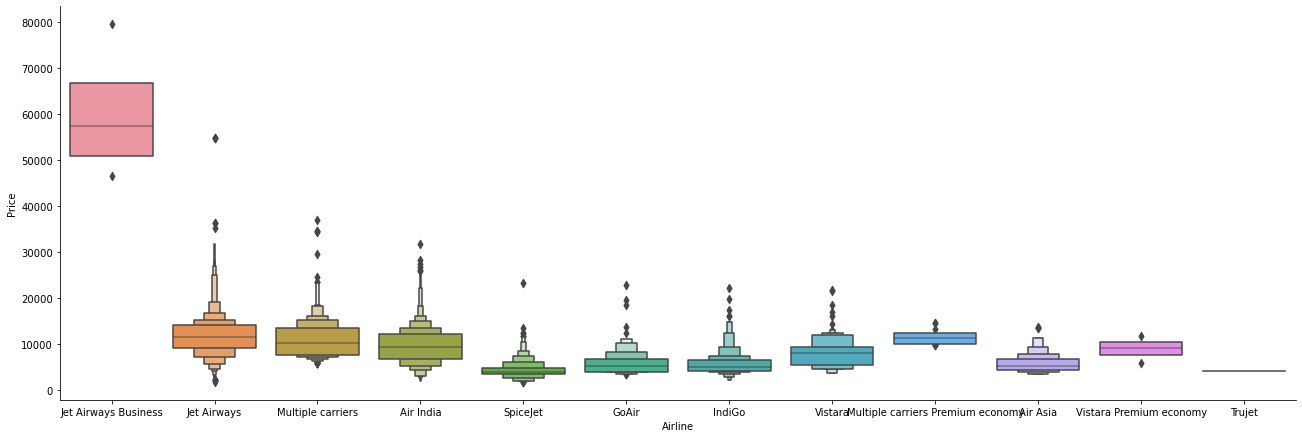

In [78]:
sns.catplot(y = "Price", x = "Airline", data = fare.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [22]:
Airline = fare[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


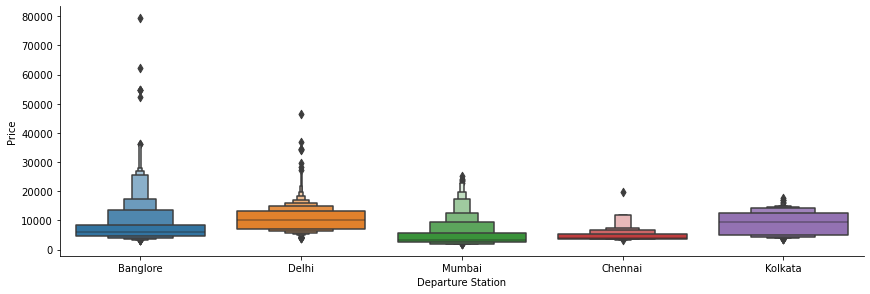

In [79]:
sns.catplot(y = "Price", x = "Departure Station", data = fare.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [23]:
Source = fare[["Departure Station"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
Destination = fare[["Arrival Station"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [25]:
fare.drop(["Route Map", "Extra Info"], axis = 1, inplace = True)

In [26]:
fare["Stops"].value_counts()

1 stop      4753
non-stop    2947
2 stops     1260
3 stops       40
Name: Stops, dtype: int64

In [27]:
fare["Stops"].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [28]:
fare.head()

,Airline,Departure Station,Arrival Station,Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [29]:
fare_data = pd.concat([fare, Airline, Source, Destination], axis = 1)

In [30]:
fare_data.head()

,Airline,Departure Station,Arrival Station,Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
fare_data.drop(["Airline", "Departure Station", "Arrival Station"], axis = 1, inplace = True)

In [38]:
fare_data.head()

,Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
fare_data.shape

(9000, 30)

In [58]:
fare_independent=fare_data.copy()

In [59]:
fare_feature=fare_independent.drop(['Price'],axis=1)

In [60]:
fare_dependent=fare_data.copy()

In [61]:
fare_target=fare_dependent['Price']

In [62]:
X_full= fare_feature.copy()

y_full = fare_target.copy()

X_full = sm.add_constant(X_full)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (6300, 30)
y_train_full (6300,)
X_test_full (2700, 30)
y_test_full (2700,)


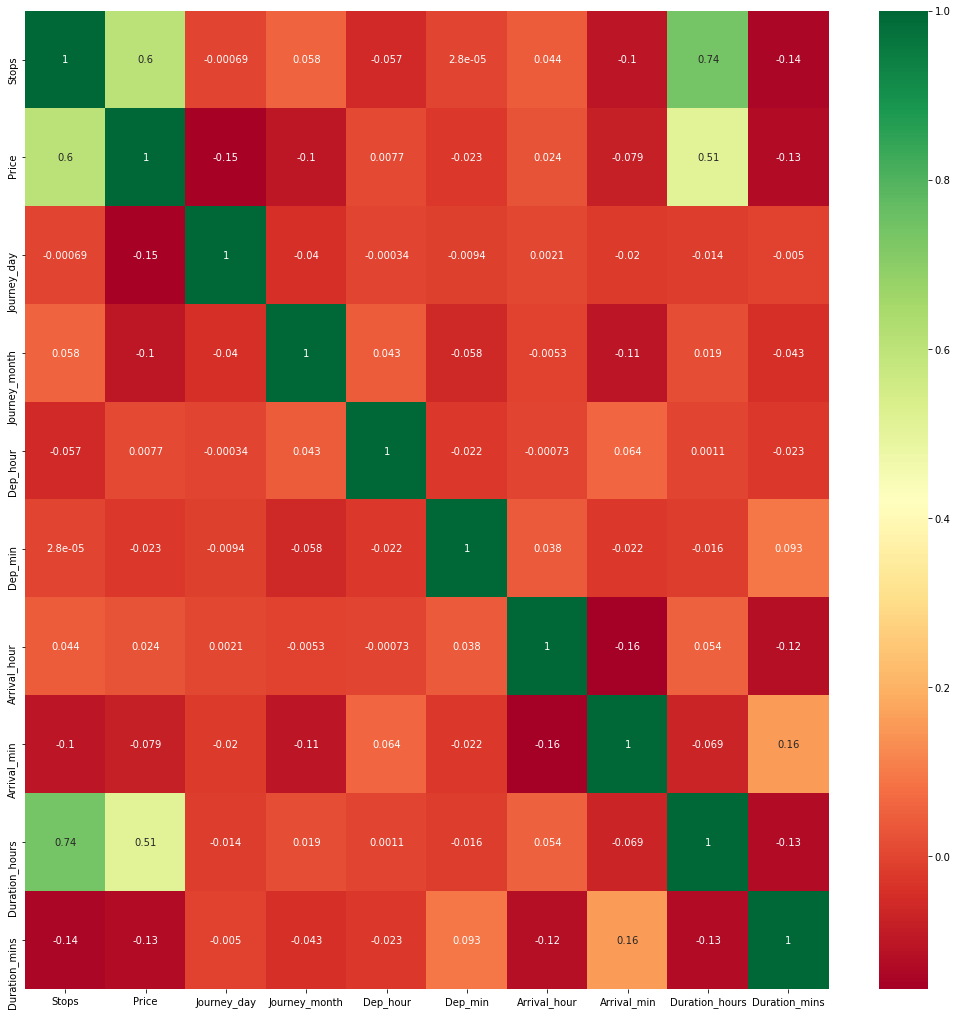

In [81]:
plt.figure(figsize = (18,18))
sns.heatmap(fare.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [63]:
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     423.0
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:52:54   Log-Likelihood:                -59078.
No. Observations:                6300   AIC:                         1.182e+05
Df Residuals:                    6274   BIC:                         1.184e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [64]:
y_pred_full = MLR_full_model.predict(X_test_full)
y_pred_full.head()

5221   12895.269989
2975    7729.290739
5786   14205.287497
8591    3798.930796
1321   13176.411989
dtype: float64

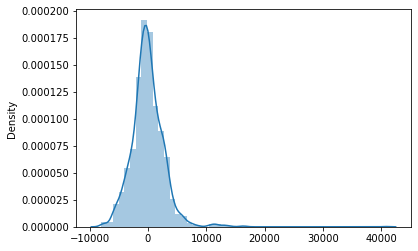

In [71]:
sns.distplot(y_test_full-y_pred_full)
plt.show()

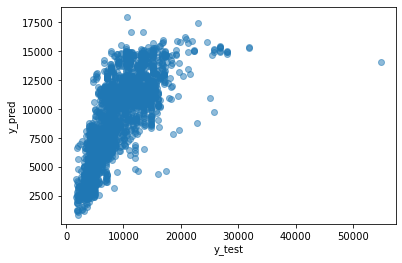

In [72]:
plt.scatter(y_test_full, y_pred_full, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [74]:
from sklearn import metrics


In [75]:
print('MAE:', metrics.mean_absolute_error(y_test_full, y_pred_full))
print('MSE:', metrics.mean_squared_error(y_test_full, y_pred_full))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_full, y_pred_full)))

MAE: 1999.80200861444
MSE: 7983162.055830835
RMSE: 2825.4490007485247


In [76]:
2090.5509/(max(y_full)-min(y_full))

0.026887077025966846

In [77]:
metrics.r2_score(y_test_full, y_pred_full)

0.5892805594435983